In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline
import cv2

In [197]:
# file kfkd.py
import os

import numpy as np
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle

#C:\Users\Jennifer\Documents\Berkeley\W207\Projects\final_team
#FTRAIN = '~/data/kaggle-facial-keypoint-detection/training.csv'
#FTEST = '~/data/kaggle-facial-keypoint-detection/test.csv'
FTRAIN = "C:\\Users\\Jennifer\\Documents\\Berkeley\\W207\\Projects\\final_team\\training.csv"
#'~\Documents\Berkeley\W207\Projects\final_team\training.csv'
FTEST = "C:\\Users\\Jennifer\\Documents\\Berkeley\\W207\\Projects\\final_team\\test.csv"
#'~\Documents\Berkeley\W207\Projects\final_team\test.csv'


def load(test=False, cols=None):
    """Loads data from FTEST if *test* is True, otherwise from FTRAIN.
    Pass a list of *cols* if you're only interested in a subset of the
    target columns.
    """
    fname = FTEST if test else FTRAIN
    df = read_csv(fname)  # load pandas dataframe

    # The Image column has pixel values separated by space; convert
    # the values to numpy arrays:
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    if cols:  # get a subset of columns
        df = df[list(cols) + ['Image']]

    print(df.count())  # prints the number of values for each column
    df = df.dropna()  # drop all rows that have missing values in them

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    if not test:  # only FTRAIN has any target columns
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # scale target coordinates to [-1, 1]
        X, y = shuffle(X, y, random_state=42)  # shuffle train data
        y = y.astype(np.float32)
    else:
        y = None

    return X, y


X, y = load()
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(
    X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(
    y.shape, y.min(), y.max()))



left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [2]:
#df = df.dropna()  # drop all rows that have missing values in them

# 2. View Raw Data

In [2]:
# Testing data has no targets available
read_csv(FTEST).head(1)

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...


In [205]:
df_train = read_csv(FTRAIN)
print (type(df_train))


<class 'pandas.core.frame.DataFrame'>


In [198]:
print(X.shape)

(2140, 9216)


In [217]:
mini_train_labels = df_train.ix[0:10, 0:30]
print (mini_train_labels)

    left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0           66.033564          39.002274           30.227008   
1           64.332936          34.970077           29.949277   
2           65.057053          34.909642           30.903789   
3           65.225739          37.261774           32.023096   
4           66.725301          39.621261           32.244810   
5           69.680748          39.968748           29.183551   
6           64.131866          34.290040           29.578953   
7           67.468893          39.413452           29.355961   
8           65.802880          34.755200           27.475840   
9           64.121231          36.740308           29.468923   
10          65.230189          34.342642           28.802717   

    right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0            36.421678                59.582075                39.647423   
1            33.448715                58.856170                35.274349   
2  

[ 0.12941177  0.21960784  0.34509805 ...,  0.21176471  0.22352941
  0.23137255]
(2140, 9216)


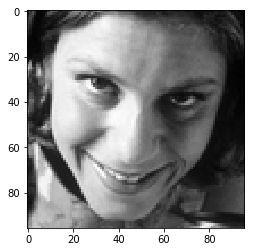

In [21]:
#look at one pic
print (X[1])
print (X.shape)
img = X[1].reshape(96,96)
plt.imshow(img,cmap='gray')

# EDA on missing values

In [218]:
train_labels = df_train.ix[:, 0:30]

In [224]:
train_labels.shape

(7049, 30)

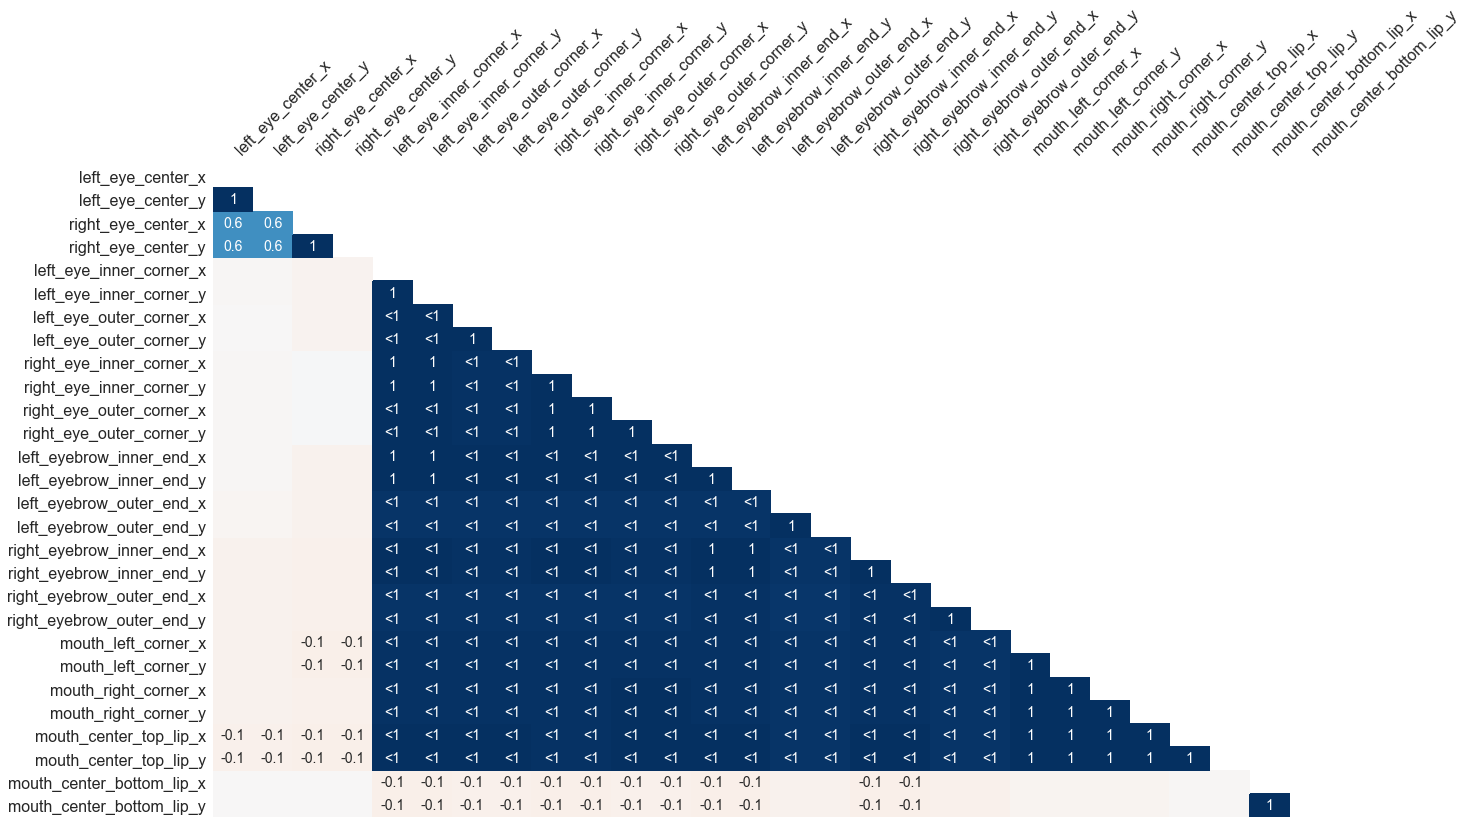

In [221]:
heatmap(train_labels)

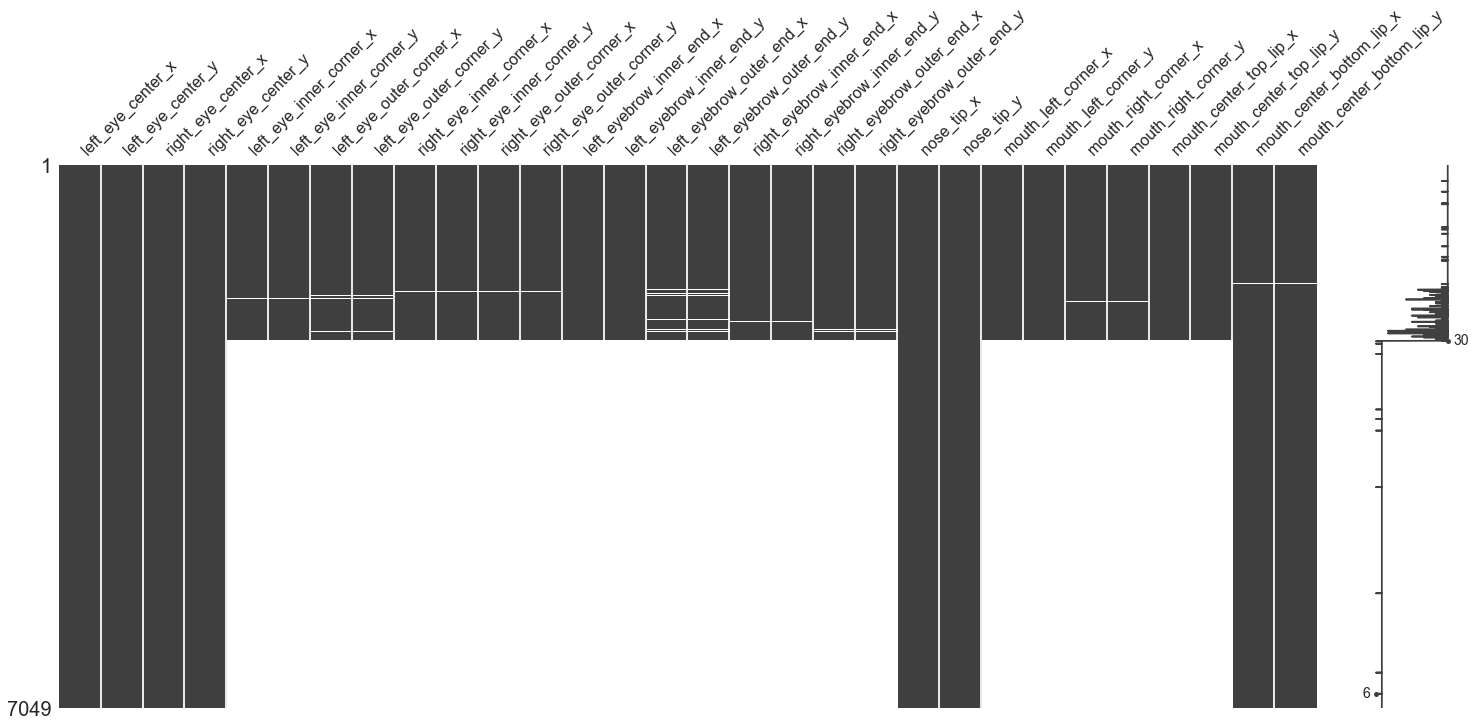

In [225]:
matrix(train_labels,7049)

# 3. Apply transformations to a single picture

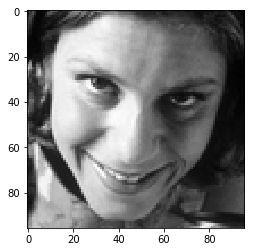

In [24]:
#Photo dodging function (lightening)
def burnV2(img, mask):
    return 255 -cv2.divide(255-image, 255-mask, scale=256)
plt.imshow(img,cmap='gray')

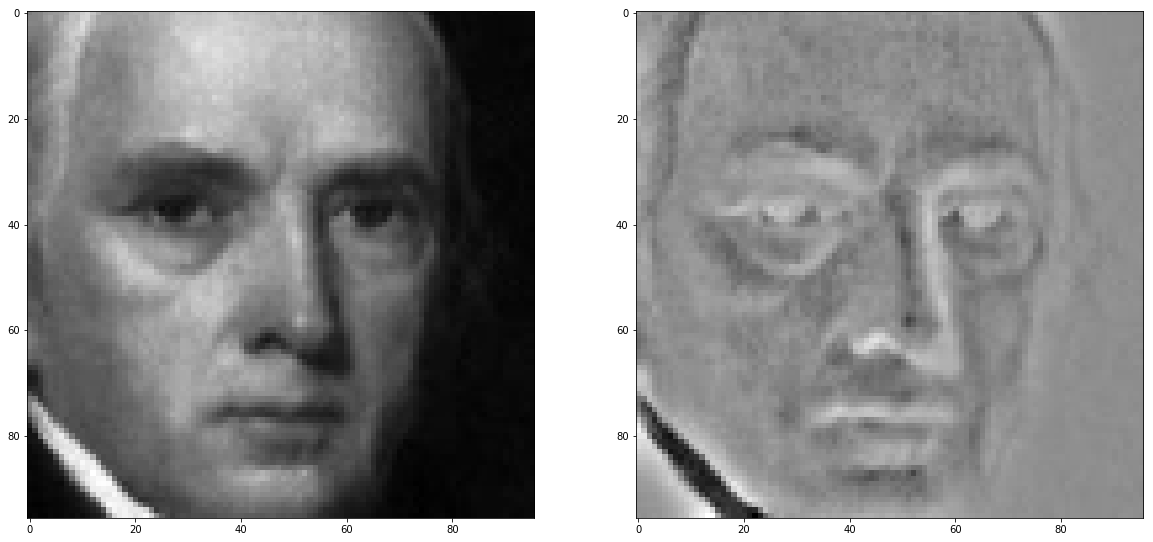

In [96]:
#can mess around with the parameters on the blur and inverse

#function to transform the images
def render(img):
    img_inv = 255 - img #inverts the colors
    img_blur = cv2.GaussianBlur(img_inv, (21,21), 0, 0) #heavy blur on the inverse
    img_blend = cv2.divide(img_inv, img_blur, scale=256) #merges the strong blur with the inverted colors
    return img_blend

#pick an image to mess with
img = X[27].reshape(96,96)
#call function
result = render(img)

#compare the results visually
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1,2,1).imshow(img,cmap='gray')
fig.add_subplot(1,2,2).imshow(result,cmap='gray')

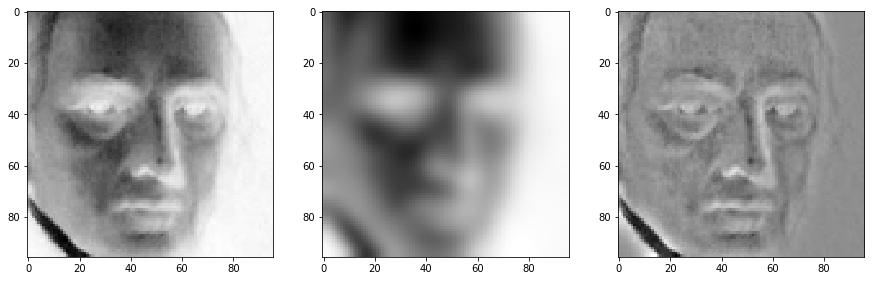

In [97]:
#A look under the hood of the transformation function
fig = plt.figure(figsize=(15, 15))
img = X[27].reshape(96,96)

img_inv = 255 - img #inverts the colors
fig.add_subplot(1,3,1).imshow(img_inv,cmap='gray')
img_blur = cv2.GaussianBlur(img_inv, (21,21), 0, 0) #heavy blur
fig.add_subplot(1,3,2).imshow(img_blur,cmap='gray')
img_blend = cv2.divide(img_inv, img_blur, scale=256) #merges the strong blur with the inverted colors
fig.add_subplot(1,3,3).imshow(img_blend,cmap='gray')



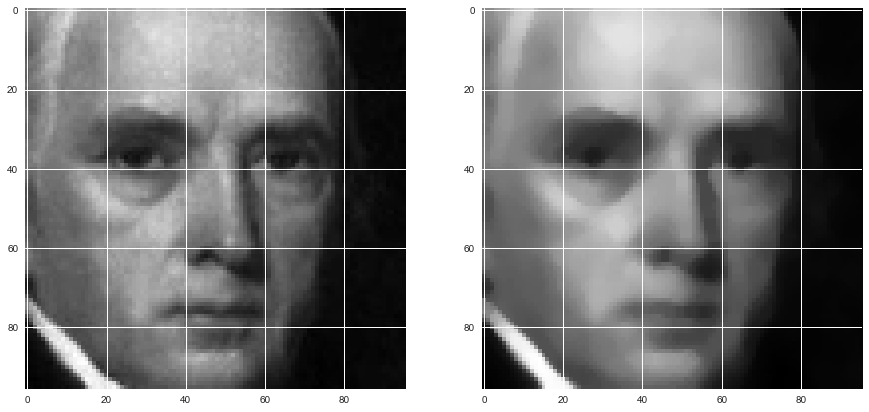

In [227]:
#Applying a Median Blur
def render(img):
    img_blur = cv2.medianBlur(img, 5)
    img_blend = cv2.divide(img, img_blur, scale=256)
    #img_edge = cv2.adaptiveThreshold(img_blend,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2)
    return img_blur

#pick an image to mess with
img = X[27].reshape(96,96)
#call function
result = render(img)

#compare the results visually
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1,2,1).imshow(img,cmap='gray')
fig.add_subplot(1,2,2).imshow(result,cmap='gray')

In [39]:
import math
import scipy.misc
from scipy.misc.pilutil import Image

(512, 512, 3)
[[0 0 0]
 [0 0 0]
 [0 0 0]
 ..., 
 [0 0 0]
 [0 0 0]
 [0 0 0]]


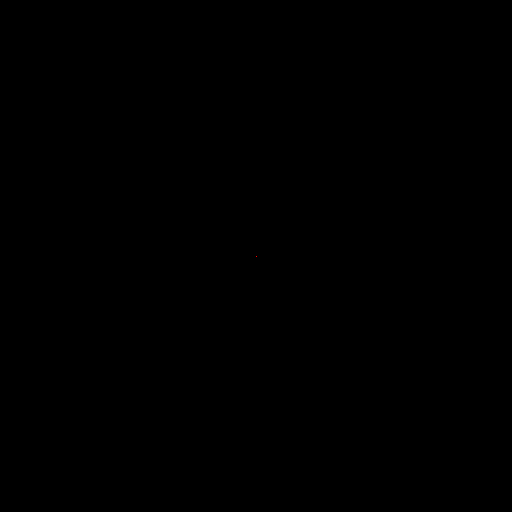

In [127]:
w, h = 512, 512
data = np.zeros((h, w, 3), dtype=np.uint8)
data[256, 256] = [255, 0, 0]
print (data.shape)
print (data[1])
Image.fromarray(data, 'RGB')


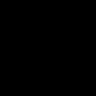

In [125]:
from PIL import Image
w, h = 512, 512
data = np.zeros((h, w, 3), dtype=np.uint8)
data[256, 256] = [255, 0, 0]

pic = X[27]
my_array = pic.reshape(96,96).astype('uint8')*255
imgT = Image.fromarray(my_array)
imgT

In [148]:

Image.fromarray(X[27].reshape(96,96), 'RGB')
im = scipy.misc.toimage(X[27].reshape(96,96))
im.save("foobar.png")
src = cv2.imread("foobar.png", 0)

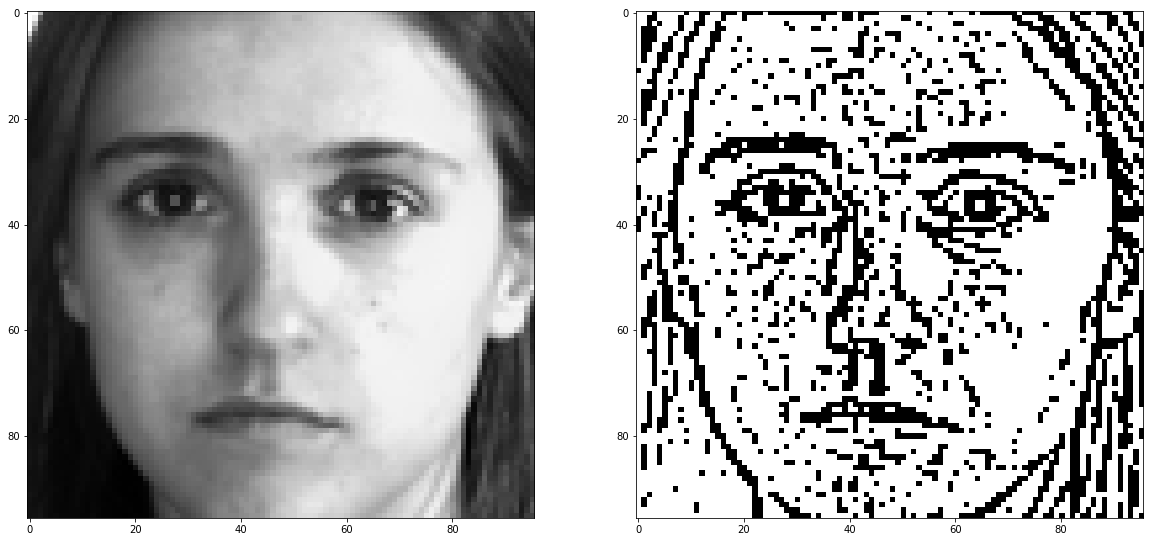

In [157]:
#Applying an adaptive filter (considers a 3x3 grid of neighbors)
#can mess with the 9 as a parameter
#pick an image to mess with & reformat it
im = scipy.misc.toimage(X[22].reshape(96,96))
im.save("foobar.png")
src = cv2.imread("foobar.png", 0)
img_edge = cv2.adaptiveThreshold(src,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 2)

#compare the results visually
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1,2,1).imshow(im,cmap='gray')

fig.add_subplot(1,2,2).imshow(img_edge,cmap='gray')

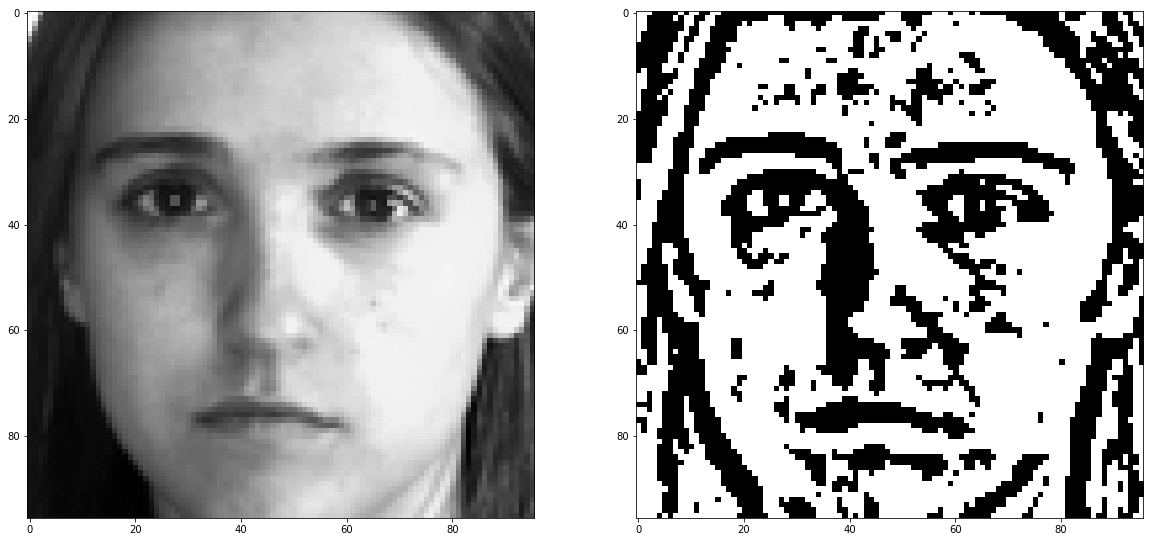

In [162]:
#Applying an adaptive filter (considers a 9x9 grid of neighbors)
#can mess with the 9 as a parameter
#pick an image to mess with & reformat it
im = scipy.misc.toimage(X[22].reshape(96,96))
im.save("foobar.png")
src = cv2.imread("foobar.png", 0)
img_edge = cv2.adaptiveThreshold(src,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2)

#compare the results visually
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1,2,1).imshow(im,cmap='gray')
fig.add_subplot(1,2,2).imshow(img_edge,cmap='gray')

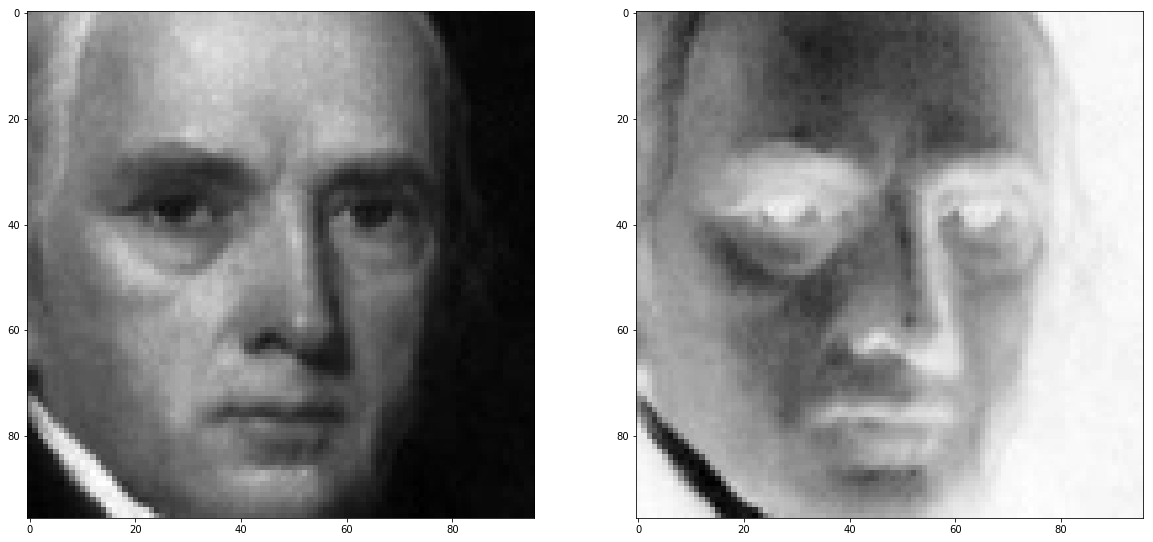

In [165]:
###Contrast stretching

#original image
img = X[27].reshape(96,96)

#contrast boosting
b = img.min().astype(float)
a = img.max().astype(float)
c = img.astype(float)
im2 = 255*(c-a)/(b-a)
img2 = im2.reshape(96,96)

#compare the results visually
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1,2,1).imshow(img,cmap='gray')
fig.add_subplot(1,2,2).imshow(img2,cmap='gray')


In [189]:
####Histogram Equalization

##not the best use of time, but I'd love to come back to it...

print (X)
im1 = scipy.misc.toimage(X[22].reshape(96,96)
#im.save("foobar.png")
#src = cv2.imread("foobar.png", 0)
#imgl = scipy.misc.fromimage(im1)

#fl = img1.flatten()
#im = scipy.misc.toimage(X[22].reshape(96,96))
#struggle = X[22]                        
#print(struggle_bus)                        
#hist, bins = np.histogram(X[22],256,[0,255])
#cummulative distribution calc'ed
cdf = hist.cumsum()

fl = X[22].reshape(1,9216)
print (fl.shape)
cdf_m = np.ma.masked_equal(cdf,0)
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max()-cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m
cdf = np.ma.filled(cdf_m,0).astype('uint8')
im2 = cdf[fl]
img2 = im2.reshape(96,96)

#compare the results visually
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1,2,1).imshow(img,cmap='gray')
fig.add_subplot(1,2,2).imshow(img2,cmap='gray')


SyntaxError: invalid syntax (<ipython-input-189-f4efc83c56cd>, line 15)

# Applying to a mini train with 1,000 pics 
-to show the transformations run smoothly 
-to test for initial acuracy (and prioritize NN accordingly)
-to parameter tune the pic transformations

In [193]:
#Make Mini datasets
mini_train_data = X[0:1000]
mini_train_labels = X[0:1000]
mini_test_data = y[0:250]
print(mini_train_data.shape)
print(mini_test_data.shape)

(1000, 9216)
(250, 30)


In [ ]:
#builds model
LR_model = LogisticRegression(penalty="l2", C = .01)
LR_model.fit(mini_train_data, train_labels)

#makes predictions on the dev dataset with the model I just built
test_predicted_labels = LR_model.predict(test_vec)

#accuracy Calcs
wrong_prediction = (test_predicted_labels != test_labels)
print "Regularization weight: " + str(c_size),

In [5]:
# add to kfkd.py
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet

net1 = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', layers.InputLayer),
        ('hidden', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    # layer parameters:
    input_shape=(None, 9216),  # 96x96 input pixels per batch
    hidden_num_units=100,  # number of units in hidden layer
    output_nonlinearity=None,  # output layer uses identity function
    output_num_units=30,  # 30 target values

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=True,  # flag to indicate we're dealing with regression problem
    max_epochs=400,  # we want to train this many epochs
    verbose=1,
    )

X, y = load()
net1.fit(X, y)

C:\Users\Jennifer\Anaconda2\envs\MLpy\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

    102     0.00474     0.00556    0.85250  0.32s
    103     0.00472     0.00554    0.85171  0.36s
    104     0.00470     0.00552    0.85087  0.32s
    105     0.00468     0.00550    0.85002  0.40s
    106     0.00466     0.00548    0.84923  0.38s
    107     0.00464     0.00547    0.84839  0.35s
    108     0.00462     0.00545    0.84752  0.36s
    109     0.00460     0.00543    0.84683  0.33s
    110     0.00458     0.00541    0.84602  0.33s
    111     0.00456     0.00539    0.84520  0.33s
    112     0.00454     0.00538    0.84449  0.33s
    113     0.00452     0.00536    0.84365  0.36s
    114     0.00450     0.00534    0.84283  0.40s
    115     0.00448     0.00532    0.84217  0.37s
    116     0.00446     0.00531    0.84132  0.35s
    117     0.00445     0.00529    0.84058  0.38s
    118     0.00443     0.00527    0.83980  0.37s
    119     0.00441     0.00526    0.83900  0.36s
    120     0.00439     0.00524    0.83823  0.40s
    121     0.00438     0.00522    0.83749  0.40s


    227     0.00315     0.00408    0.77252  0.32s
    228     0.00314     0.00407    0.77202  0.33s
    229     0.00314     0.00406    0.77138  0.35s
    230     0.00313     0.00406    0.77062  0.33s
    231     0.00312     0.00405    0.77004  0.35s
    232     0.00311     0.00404    0.76938  0.35s
    233     0.00310     0.00404    0.76866  0.35s
    234     0.00310     0.00403    0.76806  0.31s
    235     0.00309     0.00403    0.76735  0.32s
    236     0.00308     0.00402    0.76670  0.32s
    237     0.00307     0.00401    0.76613  0.32s
    238     0.00307     0.00401    0.76543  0.31s
    239     0.00306     0.00400    0.76474  0.33s
    240     0.00305     0.00399    0.76411  0.33s
    241     0.00305     0.00399    0.76347  0.33s
    242     0.00304     0.00398    0.76304  0.33s
    243     0.00303     0.00397    0.76257  0.33s
    244     0.00302     0.00397    0.76206  0.34s
    245     0.00301     0.00396    0.76145  0.34s
    246     0.00301     0.00395    0.76094  0.35s


    357     0.00244     0.00347    0.70369  0.31s
    358     0.00244     0.00346    0.70314  0.29s
    359     0.00243     0.00346    0.70253  0.33s
    360     0.00243     0.00346    0.70192  0.35s
    361     0.00243     0.00346    0.70143  0.33s
    362     0.00242     0.00345    0.70103  0.37s
    363     0.00242     0.00345    0.70072  0.31s
    364     0.00241     0.00345    0.70043  0.33s
    365     0.00241     0.00344    0.70017  0.35s
    366     0.00241     0.00344    0.69986  0.32s
    367     0.00240     0.00344    0.69961  0.32s
    368     0.00240     0.00343    0.69938  0.30s
    369     0.00240     0.00343    0.69847  0.31s
    370     0.00239     0.00344    0.69659  0.34s
    371     0.00240     0.00345    0.69364  0.33s
    372     0.00241     0.00349    0.69140  0.30s
    373     0.00243     0.00351    0.69246  0.30s
    374     0.00244     0.00350    0.69733  0.33s
    375     0.00242     0.00344    0.70201  0.31s
    376     0.00238     0.00342    0.69485  0.35s


NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x000000A8BA0C06D8>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x000000A8BA0C06A0>,
     check_input=True, custom_scores=None, hidden_num_units=100,
     input_shape=(None, 9216),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=400, more_params={},
     objective=<function objective at 0x000000A8BA235620>,
     objective_loss_function=<function squared_error at 0x000000A8B9FCE730>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog object at 0x000000A8B51B3C18>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo object at 0x000000A8B51B2748>],
     output_nonlinearity=None, output_num_units=30, regression=True,
     scores

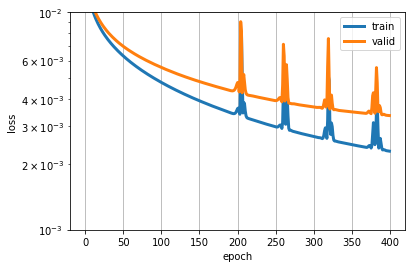

In [8]:
import matplotlib.pyplot as pyplot
train_loss = np.array([i["train_loss"] for i in net1.train_history_])
valid_loss = np.array([i["valid_loss"] for i in net1.train_history_])
pyplot.plot(train_loss, linewidth=3, label="train")
pyplot.plot(valid_loss, linewidth=3, label="valid")
pyplot.grid()
pyplot.legend()
pyplot.xlabel("epoch")
pyplot.ylabel("loss")
pyplot.ylim(1e-3, 1e-2)
pyplot.yscale("log")
pyplot.show()

In [2]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

X, _ = load(test=True)
y_pred = net1.predict(X)

fig = pyplot.figure(figsize=(6, 6))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred[i], ax)

pyplot.show()

ImageId    1783
Image      1783
dtype: int64


NameError: name 'net1' is not defined

In [5]:
def load2d(test=False, cols=None):
    X, y = load(test=test)
    X = X.reshape(-1, 1, 96, 96)
    return X, y

In [3]:
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet

C:\Users\Jennifer\Anaconda2\envs\MLpy\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
net2 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('conv3', layers.Conv2DLayer),
        ('pool3', layers.MaxPool2DLayer),
        ('hidden4', layers.DenseLayer),
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, 96, 96),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    hidden4_num_units=500, hidden5_num_units=500,
    output_num_units=30, output_nonlinearity=None,

    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=True,
    max_epochs=50,
    verbose=1,
    )

X, y = load2d()  # load 2-d data
net2.fit(X, y)

# Training for 1000 epochs will take a while.  We'll pickle the
# trained model so that we can load it back later:
import cPickle as pickle
with open('net2.pickle', 'wb') as f:
    pickle.dump(net2, f, -1)

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

ModuleNotFoundError: No module named 'cPickle'

In [ ]:
import matplotlib.pyplot as pyplot
sample1 = load(test=True)[0][6:7]
sample2 = load2d(test=True)[0][6:7]
y_pred1 = net1.predict(sample1)[0]
y_pred2 = net2.predict(sample2)[0]

fig = pyplot.figure(figsize=(6, 3))
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
plot_sample(sample1[0], y_pred1, ax)
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
plot_sample(sample1[0], y_pred2, ax)
pyplot.show()

In [ ]:
X, y = load2d()
X_flipped = X[:, :, :, ::-1]  # simple slice to flip all images

# plot two images:
fig = pyplot.figure(figsize=(6, 3))
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
plot_sample(X[1], y[1], ax)
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
plot_sample(X_flipped[1], y[1], ax)
pyplot.show()

In [ ]:
flip_indices = [
    (0, 2), (1, 3),
    (4, 8), (5, 9), (6, 10), (7, 11),
    (12, 16), (13, 17), (14, 18), (15, 19),
    (22, 24), (23, 25),
    ]

# Let's see if we got it right:
df = read_csv(os.path.expanduser(FTRAIN))
for i, j in flip_indices:
    print("# {} -> {}".format(df.columns[i], df.columns[j]))

# this prints out:
# left_eye_center_x -> right_eye_center_x
# left_eye_center_y -> right_eye_center_y
# left_eye_inner_corner_x -> right_eye_inner_corner_x
# left_eye_inner_corner_y -> right_eye_inner_corner_y
# left_eye_outer_corner_x -> right_eye_outer_corner_x
# left_eye_outer_corner_y -> right_eye_outer_corner_y
# left_eyebrow_inner_end_x -> right_eyebrow_inner_end_x
# left_eyebrow_inner_end_y -> right_eyebrow_inner_end_y
# left_eyebrow_outer_end_x -> right_eyebrow_outer_end_x
# left_eyebrow_outer_end_y -> right_eyebrow_outer_end_y
# mouth_left_corner_x -> mouth_right_corner_x
# mouth_left_corner_y -> mouth_right_corner_y

In [ ]:
from nolearn.lasagne import BatchIterator

class FlipBatchIterator(BatchIterator):
    flip_indices = [
        (0, 2), (1, 3),
        (4, 8), (5, 9), (6, 10), (7, 11),
        (12, 16), (13, 17), (14, 18), (15, 19),
        (22, 24), (23, 25),
        ]

    def transform(self, Xb, yb):
        Xb, yb = super(FlipBatchIterator, self).transform(Xb, yb)

        # Flip half of the images in this batch at random:
        bs = Xb.shape[0]
        indices = np.random.choice(bs, bs / 2, replace=False)
        Xb[indices] = Xb[indices, :, :, ::-1]

        if yb is not None:
            # Horizontal flip of all x coordinates:
            yb[indices, ::2] = yb[indices, ::2] * -1

            # Swap places, e.g. left_eye_center_x -> right_eye_center_x
            for a, b in self.flip_indices:
                yb[indices, a], yb[indices, b] = (
                    yb[indices, b], yb[indices, a])

        return Xb, yb

ImageId    1783
Image      1783
dtype: int64


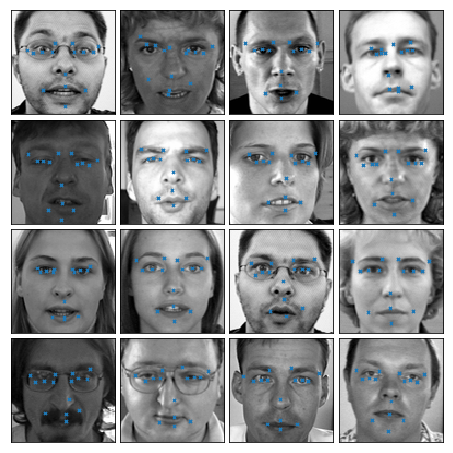

In [9]:
import matplotlib.pyplot as pyplot
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

X, _ = load(test=True)
y_pred = y

fig = pyplot.figure(figsize=(6, 6))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred[i], ax)

pyplot.show()

In [219]:
import numpy as np
import matplotlib as mpl
from matplotlib import gridspec
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import seaborn as sns
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

__version__ = "0.3.8"


def _ascending_sort(df):
    """
    Helper method for sorting.
    Returns a DataFrame whose values have been rearranged by ascending completeness.
    """
    return df.iloc[np.argsort(df.count(axis='columns').values), :]


def _descending_sort(df):
    """
    Helper method for sorting.
    Returns a DataFrame whose values have been rearranged by descending completeness.
    """
    return df.iloc[np.flipud(np.argsort(df.count(axis='columns').values)), :]


def nullity_sort(df, sort=None):
    """
    Sorts a DataFrame according to its nullity, in either ascending or descending order.
    :param df: The DataFrame object being sorted.
    :param sort: The sorting method: either "ascending", "descending", or None (default).
    :return: The nullity-sorted DataFrame.
    """
    _df = df
    if sort == "ascending":
        _df = _ascending_sort(df)
    elif sort == "descending":
        _df = _descending_sort(df)
    return _df


def _n_top_complete_filter(df, n):
    """
    Helper method for filtering a DataFrame.
    Returns the top n most populated entry columns.
    """
    return df.iloc[:, np.sort(np.argsort(df.count(axis='rows').values)[-n:])]


def _n_bottom_complete_filter(df, n):
    """
    Helper method for filtering a DataFrame.
    Returns the bottom n least populated entry columns.
    """
    return df.iloc[:, np.sort(np.argsort(df.count(axis='rows').values)[:n])]


def _p_top_complete_filter(df, p):
    """
    Helper method for filtering a DataFrame.
    Returns the entry columns which are at least p*100 percent completeness.
    """
    return df.iloc[:, [c >= p for c in df.count(axis='rows').values / len(df)]]


def _p_bottom_complete_filter(df, p):
    """
    Helper method for filtering a DataFrame.
    Returns the entry columns which are at most p*100 percent completeness.
    """
    return df.iloc[:, [c <= p for c in df.count(axis='rows').values / len(df)]]


def nullity_filter(df, filter=None, p=0, n=0):
    """
    Filters a DataFrame according to its nullity, using some combination of 'top' and 'bottom' numerical and
    percentage values. Percentages and numerical thresholds can be specified simultaneously: for example,
    to get a DataFrame with columns of at least 75% completeness but with no more than 5 columns, use
    `nullity_filter(df, filter='top', p=.75, n=5)`.
    :param df: The DataFrame whose columns are being filtered.
    :param filter: The orientation of the filter being applied to the DataFrame. One of, "top", "bottom",
    or None (default). The filter will simply return the DataFrame if you leave the filter argument unspecified or
    as None.
    :param p: A completeness ratio cut-off. If non-zero the filter will limit the DataFrame to columns with at least p
    completeness. Input should be in the range [0, 1].
    :param n: A numerical cut-off. If non-zero no more than this number of columns will be returned.
    :return: The nullity-filtered `DataFrame`.
    """
    _df = df
    if filter == "top":
        if p:
            _df = _p_top_complete_filter(_df, p)
        if n:
            _df = _n_top_complete_filter(_df, n)
    elif filter == "bottom":
        if p:
            _df = _p_bottom_complete_filter(_df, p)
        if n:
            _df = _n_bottom_complete_filter(_df, n)
    return _df


def matrix(df,
           filter=None, n=0, p=0, sort=None,
           figsize=(25, 10), width_ratios=(15, 1), color=(0.25, 0.25, 0.25),
           fontsize=16, labels=None, sparkline=True, inline=True,
           freq=None):
    """
    Presents a `matplotlib` matrix visualization of the nullity of the given DataFrame.
    Note that for the default `figsize` 250 is a soft display limit: specifying a number of records greater than
    approximately this value will cause certain records to show up in the sparkline but not in the matrix, which can
    be confusing.
    The default vertical display will fit up to 50 columns. If more than 50 columns are specified and the labels
    parameter is left unspecified the visualization will automatically drop the labels as they will not be very
    readable. You can override this behavior using `labels=True` and your own `fontsize` parameter.
    :param df: The DataFrame whose completeness is being nullity matrix mapped.
    :param filter: The filter to apply to the heatmap. Should be one of "top", "bottom", or None (default). See
    `nullity_filter()` for more information.
    :param n: The cap on the number of columns to include in the filtered DataFrame. See  `nullity_filter()` for
    more information.
    :param p: The cap on the percentage fill of the columns in the filtered DataFrame. See  `nullity_filter()` for
    more information.
    :param sort: The sort to apply to the heatmap. Should be one of "ascending", "descending", or None. See
    `nullity_sort()` for more information.
    :param figsize: The size of the figure to display. This is a `matplotlib` parameter.
    For the vertical configuration this defaults to (20, 10); the horizontal configuration computes a sliding value
    by default based on the number of columns that need to be displayed.
    :param fontsize: The figure's font size. This default to 16.
    :param labels: Whether or not to display the column names. Would need to be turned off on particularly large
    displays. Defaults to True.
    :param sparkline: Whether or not to display the sparkline. Defaults to True.
    :param width_ratios: The ratio of the width of the matrix to the width of the sparkline. Defaults to `(15,
    1)`. Does nothing if `sparkline=False`.
    :param color: The color of the filled columns. Default is a medium dark gray: the RGB multiple `(0.25, 0.25, 0.25)`.
    :return: If `inline` is True, the underlying `matplotlib.figure` object. Else, nothing.
    """

    # Apply filters and sorts.
    df = nullity_filter(df, filter=filter, n=n, p=p)
    df = nullity_sort(df, sort=sort)

    height = df.shape[0]
    width = df.shape[1]

    # z is the color-mask array.
    z = df.notnull().values

    # g is a NxNx3 matrix
    g = np.zeros((height, width, 3))

    # Apply the z color-mask to set the RGB of each pixel.
    g[z < 0.5] = [1, 1, 1]
    g[z > 0.5] = color

    # Set up the matplotlib grid layout.
    # If the sparkline is removed the layout is a unary subplot.
    # If the sparkline is included the layout is a left-right subplot.
    fig = plt.figure(figsize=figsize)
    if sparkline:
        gs = gridspec.GridSpec(1, 2, width_ratios=width_ratios)
        gs.update(wspace=0.08)
        ax1 = plt.subplot(gs[1])
    else:
        gs = gridspec.GridSpec(1, 1)
    ax0 = plt.subplot(gs[0])

    # Create the nullity plot.
    ax0.imshow(g, interpolation='none')

    # Remove extraneous default visual elements.
    ax0.set_aspect('auto')
    ax0.grid(b=False)
    ax0.xaxis.tick_top()
    ax0.xaxis.set_ticks_position('none')
    ax0.yaxis.set_ticks_position('none')
    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)
    ax0.spines['bottom'].set_visible(False)
    ax0.spines['left'].set_visible(False)

    # Set up and rotate the column ticks.
    # The labels argument is set to None by default. If the user specifies it in the argument,
    # respect that specification. Otherwise display for <= 50 columns and do not display for > 50.
    if labels or (labels is None and len(df.columns) <= 50):
        ha = 'left'
        ax0.set_xticks(list(range(0, width)))
        ax0.set_xticklabels(list(df.columns), rotation=45, ha=ha, fontsize=fontsize)
    else:
        ax0.set_xticks([])

    # Adds Timestamps ticks if freq is not None,
    # else sets up the two top-bottom row ticks.
    if freq:
        ts_list = []

        if type(df.index) == pd.PeriodIndex:
            ts_array = pd.date_range(df.index.to_timestamp().date[0],
                                     df.index.to_timestamp().date[-1],
                                     freq=freq).values

            ts_ticks = pd.date_range(df.index.to_timestamp().date[0],
                                     df.index.to_timestamp().date[-1],
                                     freq=freq).map(lambda t:
                                                    t.strftime('%Y-%m-%d'))

        elif type(df.index) == pd.DatetimeIndex:
            ts_array = pd.date_range(df.index.date[0], df.index.date[-1],
                                     freq=freq).values

            ts_ticks = pd.date_range(df.index.date[0], df.index.date[-1],
                                     freq=freq).map(lambda t:
                                                    t.strftime('%Y-%m-%d'))
        else:
            raise KeyError("Dataframe index must be PeriodIndex or DatetimeIndex.")
        try:
            for value in ts_array:
                ts_list.append(df.index.get_loc(value))
        except KeyError:
            raise KeyError("Could not divide time index into desired frequency.")

        ax0.set_yticks(ts_list)
        ax0.set_yticklabels(ts_ticks, fontsize=20, rotation=0)
    else:
        ax0.set_yticks([0, df.shape[0] - 1])
        ax0.set_yticklabels([1, df.shape[0]], fontsize=20, rotation=0)

    # Create the inter-column vertical grid.
    in_between_point = [x + 0.5 for x in range(0, width - 1)]
    for in_between_point in in_between_point:
        ax0.axvline(in_between_point, linestyle='-', color='white')

    if sparkline:
        # Calculate row-wise completeness for the sparkline.
        completeness_srs = df.notnull().astype(bool).sum(axis=1)
        x_domain = list(range(0, height))
        y_range = list(reversed(completeness_srs.values))
        min_completeness = min(y_range)
        max_completeness = max(y_range)
        min_completeness_index = y_range.index(min_completeness)
        max_completeness_index = y_range.index(max_completeness)

        # Set up the sparkline.
        ax1.grid(b=False)
        ax1.set_aspect('auto')
        # set_facecolor in mpl >= 2.0.0, set_axis_bgcolor in mpl < 2.0.0
        # GH 25
        if int(mpl.__version__[0]) <= 1:
            ax1.set_axis_bgcolor((1, 1, 1))
        else:
            ax1.set_facecolor((1, 1, 1))
        # Remove the black border.
        ax1.spines['top'].set_visible(False)
        ax1.spines['right'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        # Set y-margin to 0.
        ax1.set_ymargin(0)

        # Plot sparkline---plot is sideways so the x and y axis are reversed.
        ax1.plot(y_range, x_domain, color=color)

        if labels:
            # Figure out what case to display the label in: mixed, upper, lower.
            label = 'Data Completeness'
            if df.columns[0].islower():
                label = label.lower()
            if df.columns[0].isupper():
                label = label.upper()

            # Set up and rotate the sparkline label.
            ha = 'left'
            ax1.set_xticks([min_completeness + (max_completeness - min_completeness) / 2])
            ax1.set_xticklabels([label], rotation=45, ha=ha, fontsize=fontsize)
            ax1.xaxis.tick_top()
            ax1.set_yticks([])
        else:
            ax1.set_xticks([])
            ax1.set_yticks([])

        # Add maximum and minimum labels.
        ax1.annotate(max_completeness,
                     xy=(max_completeness, max_completeness_index),
                     xytext=(max_completeness + 2, max_completeness_index),
                     fontsize=14,
                     va='center',
                     ha='left')
        ax1.annotate(min_completeness,
                     xy=(min_completeness, min_completeness_index),
                     xytext=(min_completeness - 2, min_completeness_index),
                     fontsize=14,
                     va='center',
                     ha='right')

        # Add maximum and minimum circles.
        ax1.set_xlim([min_completeness - 2, max_completeness + 2])  # Otherwise the circles are cut off.
        ax1.plot([min_completeness], [min_completeness_index], '.', color=color, markersize=10.0)
        ax1.plot([max_completeness], [max_completeness_index], '.', color=color, markersize=10.0)

        # Remove tick mark (only works after plotting).
        ax1.xaxis.set_ticks_position('none')

    # Plot if inline, return the figure if not.
    if inline:
        plt.show()
    else:
        return fig


def bar(df, figsize=(24, 10), fontsize=16, labels=None, log=False, color=(0.25, 0.25, 0.25), inline=True,
        filter=None, n=0, p=0, sort=None):
    """
    Plots a bar chart of data nullities by column.
    :param df: The DataFrame whose completeness is being nullity matrix mapped.
    :param log: Whether or not to display a logorithmic plot. Defaults to False (linear).
    :param filter: The filter to apply to the heatmap. Should be one of "top", "bottom", or None (default). See
    `nullity_filter()` for more information.
    :param n: The cap on the number of columns to include in the filtered DataFrame. See  `nullity_filter()` for
    more information.
    :param p: The cap on the percentage fill of the columns in the filtered DataFrame. See  `nullity_filter()` for
    more information.
    :param sort: The sort to apply to the heatmap. Should be one of "ascending", "descending", or None. See
    `nullity_sort()` for more information.
    :param figsize: The size of the figure to display. This is a `matplotlib` parameter. Defaults to (24,
    10).
    :param fontsize: The figure's font size. This default to 16.
    :param labels: Whether or not to display the column names. Would need to be turned off on particularly large
    displays. Defaults to True.
    :param color: The color of the filled columns. Default is a medium dark gray: the RGB multiple `(0.25, 0.25, 0.25)`.
    :return: If `inline` is True, the underlying `matplotlib.figure` object. Else, nothing.
    """
    # Get counts.
    nullity_counts = len(df) - df.isnull().sum()

    # Apply filters and sorts.
    df = nullity_filter(df, filter=filter, n=n, p=p)
    df = nullity_sort(df, sort=sort)

    # Create the basic plot.
    fig = plt.figure(figsize=figsize)
    (nullity_counts / len(df)).plot(kind='bar', figsize=figsize, fontsize=fontsize, color=color, log=log)

    # Get current axis.
    ax1 = plt.gca()

    # Start appending elements, starting with a modified bottom x axis.
    if labels or (labels is None and len(df.columns) <= 50):
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=fontsize)

        # Create the numerical ticks.
        ax2 = ax1.twinx()
        if not log:
            # Simple if the plot is ordinary.
            ax2.set_yticks(ax1.get_yticks())
            ax2.set_yticklabels([int(n*len(df)) for n in ax1.get_yticks()], fontsize=fontsize)
        else:
            # For some reason when a logarithmic plot is specified `ax1` always contains two more ticks than actually
            # appears in the plot. For example, if we do `msno.histogram(collisions.sample(500), log=True)` the contents
            # of the naive `ax1.get_yticks()` is [1.00000000e-03, 1.00000000e-02, 1.00000000e-01, 1.00000000e+00,
            # 1.00000000e+01]. The fix is to ignore the first and last entries.
            #
            # Also note that when a log scale is used, we have to make it match the `ax1` layout ourselves.
            ax2.set_yscale('log')
            ax2.set_ylim(ax1.get_ylim())
            ax2.set_yticks(ax1.get_yticks()[1:-1])
            ax2.set_yticklabels([int(n*len(df)) for n in ax1.get_yticks()[1:-1]], fontsize=fontsize)

    # Create the third axis, which displays columnar totals above the rest of the plot.
    ax3 = ax1.twiny()
    ax3.set_xticks(ax1.get_xticks())
    ax3.set_xlim(ax1.get_xlim())
    ax3.set_xticklabels(nullity_counts.values, fontsize=fontsize, rotation=45, ha='left')
    ax3.grid(False)

    # Display.
    if inline:
        plt.show()
    else:
        return fig


def heatmap(df, inline=True,
            filter=None, n=0, p=0, sort=None,
            figsize=(20, 12), fontsize=16, labels=True, cmap='RdBu'
            ):
    """
    Presents a `seaborn` heatmap visualization of nullity correlation in the given DataFrame.
    
    Note that this visualization has no special support for large datasets. For those, try the dendrogram instead.
    
    :param df: The DataFrame whose completeness is being heatmapped.
    :param filter: The filter to apply to the heatmap. Should be one of "top", "bottom", or None (default). See
    `nullity_filter()` for more information.
    :param n: The cap on the number of columns to include in the filtered DataFrame. See  `nullity_filter()` for
    more information.
    :param p: The cap on the percentage fill of the columns in the filtered DataFrame. See  `nullity_filter()` for
    more information.
    :param sort: The sort to apply to the heatmap. Should be one of "ascending", "descending", or None. See
    `nullity_sort()` for more information.
    :param figsize: The size of the figure to display. This is a `matplotlib` parameter which defaults to (20, 12).
    :param fontsize: The figure's font size.
    :param labels: Whether or not to label each matrix entry with its correlation (default is True).
    :param cmap: What `matplotlib` colormap to use. Defaults to `RdBu`.
    :param inline: Whether or not the figure is inline. If it's not then instead of getting plotted, this method will
    return its figure.
    :return: If `inline` is True, the underlying `matplotlib.figure` object. Else, nothing.
    """
    # Apply filters and sorts.
    df = nullity_filter(df, filter=filter, n=n, p=p)
    df = nullity_sort(df, sort=sort)

    # Set up the figure.
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(1, 1)
    ax0 = plt.subplot(gs[0])

    # Pre-processing: remove completely filled or completely empty variables.
    df = df.iloc[:,[i for i, n in enumerate(np.var(df.isnull(), axis='rows')) if n > 0]]

    # Create and mask the correlation matrix.
    corr_mat = df.isnull().corr()
    # corr_mat = corr_mat.replace(np.nan, 1)
    # corr_mat[np.isnan(corr_mat)] = 0
    mask = np.zeros_like(corr_mat)
    mask[np.triu_indices_from(mask)] = True

    # Set fontsize.
    # fontsize = _set_font_size(fig, df, fontsize)

    # Construct the base heatmap.
    if labels:
        sns.heatmap(corr_mat, mask=mask, cmap=cmap, ax=ax0, cbar=False,
                    annot=True, annot_kws={"size": fontsize - 2})
    else:
        sns.heatmap(corr_mat, mask=mask, cmap=cmap, ax=ax0, cbar=False)

    # Apply visual corrections and modifications.
    ax0.set_xticklabels(ax0.xaxis.get_majorticklabels(), rotation=45, ha='left', fontsize=fontsize)
    ax0.set_yticklabels(ax0.yaxis.get_majorticklabels(), fontsize=fontsize, rotation=0)
    ax0.set_yticklabels(ax0.yaxis.get_majorticklabels(), rotation=0, fontsize=fontsize)

    ax0.xaxis.tick_top()
    ax0.patch.set_visible(False)

    # Fix up annotation label rendering.
    for text in ax0.texts:
        t = float(text.get_text())
        if 0.95 <= t < 1:
            text.set_text("<1")
        elif -1 < t <= -0.95:
            text.set_text(">-1")
        elif t == 1:
            text.set_text("1")
        elif t == -1:
            text.set_text("-1")
        elif -0.05 < t < 0.05:
            text.set_text("")
        else:
            text.set_text(round(t, 1))

    if inline:
        plt.show()
    else:
        return fig

    
def dendrogram(df, method='average',
               filter=None, n=0, p=0, sort=None,
               orientation=None, figsize=None,
               fontsize=16, inline=True
               ):
    """
    Fits a `scipy` hierarchical clustering algorithm to the given DataFrame's variables and visualizes the results as
    a `scipy` dendrogram.
    
    The default vertical display will fit up to 50 columns. If more than 50 columns are specified and orientation is
    left unspecified the dendrogram will automatically swap to a horizontal display to fit the additional variables.
    :param df: The DataFrame whose completeness is being dendrogrammed.
    :param method: The distance measure being used for clustering. This is a parameter that is passed to 
    `scipy.hierarchy`.
    :param filter: The filter to apply to the heatmap. Should be one of "top", "bottom", or None (default). See
    `nullity_filter()` for more information.
    :param n: The cap on the number of columns to include in the filtered DataFrame. See  `nullity_filter()` for
    more information.
    :param p: The cap on the percentage fill of the columns in the filtered DataFrame. See  `nullity_filter()` for
    more information.
    :param sort: The sort to apply to the heatmap. Should be one of "ascending", "descending", or None. See
    `nullity_sort()` for more information.
    :param figsize: The size of the figure to display. This is a `matplotlib` parameter which defaults to `(25, 10)`.
    :param fontsize: The figure's font size.
    :param orientation: The way the dendrogram is oriented. Defaults to top-down if there are less than or equal to 50
    columns and left-right if there are more.
    :param inline: Whether or not the figure is inline. If it's not then instead of getting plotted, this method will
    return its figure.
    :return: If `inline` is True, the underlying `matplotlib.figure` object. Else, nothing.
    """
    # Figure out the appropriate figsize.
    if not figsize:
        if len(df.columns) <= 50 or orientation == 'top' or orientation == 'bottom':
            figsize = (25, 10)
        else:
            figsize = (25, (25 + len(df.columns) - 50)*0.5)
    
    # Set up the figure.
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(1, 1)
    ax0 = plt.subplot(gs[0])

    # Apply filters and sorts.
    df = nullity_filter(df, filter=filter, n=n, p=p)
    df = nullity_sort(df, sort=sort)

    # Link the hierarchical output matrix.
    x = np.transpose(df.isnull().astype(int).values)
    z = hierarchy.linkage(x, method)

    # Figure out orientation.
    if not orientation:
        if len(df.columns) > 50:
            orientation = 'left'
        else:
            orientation = 'bottom'

    # Construct the base dendrogram.
    ret = hierarchy.dendrogram(z,
                               orientation=orientation,
                               labels=df.columns.tolist(),
                               distance_sort='descending',
                               link_color_func=lambda c: 'black',
                               leaf_font_size=fontsize,
                               ax=ax0
                               )

    # Remove extraneous default visual elements.
    ax0.set_aspect('auto')
    ax0.grid(b=False)
    if orientation == 'bottom':
        ax0.xaxis.tick_top()
    ax0.xaxis.set_ticks_position('none')
    ax0.yaxis.set_ticks_position('none')
    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)
    ax0.spines['bottom'].set_visible(False)
    ax0.spines['left'].set_visible(False)
    ax0.patch.set_visible(False)

    # Set up the categorical axis labels.
    if orientation == 'bottom':
        ax0.set_xticklabels(ax0.xaxis.get_majorticklabels(), rotation=45, ha='left')
    elif orientation == 'top':
        ax0.set_xticklabels(ax0.xaxis.get_majorticklabels(), rotation=45, ha='right')
    if orientation == 'bottom' or orientation == 'top':
        ax0.tick_params(axis='y', labelsize=20)
    else:
        ax0.tick_params(axis='x', labelsize=20)

    if inline:
        plt.show()
    else:
        return fig


def _calculate_geographic_nullity(geo_group, x_col, y_col):
    """
    Helper method which calculates the nullity of a DataFrame. Factored out of and used within `geoplot`.
    """
    # Aggregate by point and fetch a list of non-null coordinate pairs, which is returned.
    point_groups = geo_group.groupby([x_col, y_col])
    points = [point for point in point_groups.groups.keys() if pd.notnull(point[0]) and pd.notnull(point[1])]
    # Calculate nullities by location, then take their average within the overall feature.
    counts = np.sum(point_groups.count().values, axis=1)
    entries = point_groups.size()
    width = len(geo_group.columns)
    # Remove empty (NaN, NaN) points.
    if len(entries) > 0:  # explicit check to avoid a Runtime Warning
        geographic_nullity = np.average(1 - counts / width / entries)
        return points, geographic_nullity
    else:
        return points, np.nan


def geoplot(df, x=None, y=None, coordinates=None, by=None, geometry=None, cutoff=None, histogram=False,
            figsize=(25, 10), fontsize=8, inline=True):
    """
    Generates a geographical data nullity heatmap, which shows the distribution of missing data across geographic
    regions. The precise output depends on the inputs provided. In increasing order of usefulness:
    *   If no geographical context is provided, a quadtree is computed and nullities are rendered as abstract
        geopgrahical squares.
    *   If geographical context is provided in the form of a column of geographies (region, borough. ZIP code,
        etc.) in the `DataFrame`, convex hulls are computed for each of the point groups and the heatmap is generated
        within them.
    *   If geographical context is provided *and* a separate geometry is provided, a heatmap is generated for each
        point group within this geograpby instead.
    :param df: The DataFrame whose completeness is being mapped.
    :param x: The x variable: probably a coordinate (longitude), possibly some other floating point value. May be a
    string (pointing to a column of df) or an iterable.
    :param y: The y variable: probably a coordinate (latitude), possibly some other floating point value. May be a
    string (pointing to a column of df) or an iterable.
    :param coordinates: A coordinate tuple iterable, or column thereof in the given DataFrame. One of x AND y OR
    coordinates must be specified, but not both.
    :param by: If you would like to aggregate your geometry by some geospatial attribute of the underlying DataFrame,
    name that column here.
    :param geometry: If you would like to provide your own geometries for your aggregation, instead of relying on
    (functional, but not pretty) convex hulls, provide them here. This parameter is expected to be a dict or Series
    of `shapely.Polygon` or `shapely.MultiPolygon` objects. It's ignored if `by` is not specified.
    :param cutoff: If no aggregation is specified, this parameter sets the minimum number of observations to include in
    each square. If not provided, set to 50 or 5% of the total size of the dataset, whichever is smaller. If `by` is
    specified this parameter is ignored.
    :param figsize: The size of the figure to display. This is a `matplotlib` parameter which defaults to (25, 10).
    :param histogram: Whether or not to plot a histogram of data distributions below the map. Defaults to False.
    :param fontsize: If `hist` is specified, this parameter specifies the size of the tick labels. Ignored if `hist`
    is not specified. Defaults to 8.
    :param inline: Whether or not the figure is inline. If it's not then instead of getting plotted, this method will
    return its figure.
    :return: If `inline` is True, the underlying `matplotlib.figure` object. Else, nothing.
    """
    import shapely.geometry
    import descartes
    import matplotlib.cm
    # We produce a coordinate column in-place in a function-local copy of the `DataFrame`.
    # This seems specious, and sort of is, but is necessary because the internal `pandas` aggregation methods
    # (`pd.core.groupby.DataFrameGroupBy.count` specifically) are optimized to run two orders of magnitude faster than
    # user-defined external `groupby` operations. For example:
    # >>> %time df.head(100000).groupby(lambda ind: df.iloc[ind]['LOCATION']).count()
    # Wall time: 12.7 s
    # >>> %time df.head(100000).groupby('LOCATION').count()
    # Wall time: 96 ms
    x_col = '__x'
    y_col = '__y'
    if x and y:
        if isinstance(x, str) and isinstance(y, str):
            x_col = x
            y_col = y
        else:
            df['__x'] = x
            df['__y'] = y
    elif coordinates:
        if isinstance(coordinates, str):
            # Quick conversion to enable fancy numpy indexing. This allows fast operations like `df[coord_col][0,...]`
            coord_col = np.array([np.array(e) if pd.notnull(e) else np.array(np.nan, np.nan) for e in df[coordinates]])
            df['__x'] = coord_col[:, 0]
            df['__y'] = coord_col[:, 1]
        else:
            # cf. Above.
            coord_col = np.array([np.array(e) for e in coordinates])
            df['__x'] = coord_col[:, 0]
            df['__y'] = coord_col[:, 1]
    else:
        raise IndexError("x AND y OR coordinates parameters expected.")

    # Set the cutoff variable.
    if cutoff is None: cutoff = np.min([50, 0.05 * len(df)])

    # fig, ax = plt.subplots()
    fig = plt.figure(figsize=figsize)
    ax = plt.subplot(111)

    # In case we're given something to categorize by, use that.
    if by:
        nullity_dict = dict()
        # This loop calculates and stores geographic feature averages and their polygons.
        for identifier, geo_group in df.groupby(by):  # ex. ('BRONX', <pd.DataFrame with 10511 objects>)
            # A single observation in the group will produce a `Point` hull, while two observations in the group
            # will produce a `LineString` hull. Neither of these is desired, nor accepted by `PatchCollection`
            # further on. So we remove these cases by filtering them (1) before and (2) after aggregation steps.
            # cf. http://toblerity.org/shapely/manual.html#object.convex_hull
            if not len(geo_group) > 2:
                continue

            # The following subroutine groups `geo_group` by `x_col` and `y_col`, and calculates and returns
            # a list of points in the group (`points`) as well as its overall nullity (`geographic_nullity`).
            points, geographic_nullity = _calculate_geographic_nullity(geo_group, x_col, y_col)

            # If thinning the points, above, reduced us below the threshold for a proper polygonal hull (See the
            # note at the beginning of thos loop), stop here.
            if not len(points) > 2:
                continue

            # If no geometry is provided, calculate and store the hulls and averages.
            if geometry is None:
                    hull = shapely.geometry.MultiPoint(points).convex_hull
                    nullity_dict[identifier] = {'nullity': geographic_nullity, 'shapes': [hull]}

            # If geometry is provided, use that instead.
            else:
                geom = geometry[identifier]
                polygons = []
                # Valid polygons are simple polygons (`shapely.geometry.Polygon`) and complex multi-piece polygons
                # (`shapely.geometry.MultiPolygon`). The latter is an iterable of its components, so if the shape is
                # a `MultiPolygon`, append it as that list. Otherwise if the shape is a basic `Polygon`,
                # append a list with one element, the `Polygon` itself.
                if isinstance(geom, shapely.geometry.MultiPolygon):
                    polygons = shapely.ops.cascaded_union([p for p in geometry])
                else:  # shapely.geometry.Polygon
                    polygons = [geom]
                nullity_dict[identifier] = {'nullity': geographic_nullity, 'shapes': polygons}

        # Prepare a colormap.
        nullities = [nullity_dict[key]['nullity'] for key in nullity_dict.keys()]
        colors = matplotlib.cm.YlOrRd(plt.Normalize(0, 1)(nullities))

        # Now we draw.
        for i, polygons in enumerate([(nullity_dict[key]['shapes']) for key in nullity_dict.keys()]):
            for polygon in polygons:
                ax.add_patch(descartes.PolygonPatch(polygon, fc=colors[i], ec='white', alpha=0.8, zorder=4))
        ax.axis('equal')

        # Remove extraneous plotting elements.
        ax.grid(b=False)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.patch.set_visible(False)

    # In case we aren't given something to categorize by, we choose a spatial representation that's reasonably
    # efficient and informative: quadtree rectangles.
    # Note: SVD could perhaps be applied to the axes to discover point orientation and realign the grid to match
    # that, but I'm uncertain that this computationally acceptable and, in the case of comparisons, even a good
    # design choice. Perhaps this could be implemented at a later date.
    else:
        df = df[(pd.notnull(df[x_col])) & (pd.notnull(df[y_col]))]
        min_x, max_x = df[x_col].min(), df[x_col].max()
        min_y, max_y = df[y_col].min(), df[y_col].max()

        rectangles = []

        # Recursive quadtree. This subroutine, when, builds a dictionary of squares, stored by tuples keyed with
        # (min_x, max_x, min_y, max_y), whose values are the nullity of squares containing less than 100 observations.
        def squarify(_min_x, _max_x, _min_y, _max_y, df):
            arr = df[[x_col, y_col]].values
            points_inside = df[(_min_x < arr[:,0]) &
                               (arr[:,0] < _max_x) &
                               (_min_y < arr[:,1]) &
                               (arr[:,1] < _max_y)]
            if len(points_inside) < cutoff:
                # The following subroutine groups `geo_group` by `x_col` and `y_col`, and calculates and returns
                # a list of points in the group (`points`) as well as its overall nullity (`geographic_nullity`). The
                # first of these calculations is ignored.
                _, square_nullity = _calculate_geographic_nullity(points_inside, x_col, y_col)
                rectangles.append(((_min_x, _max_x,_min_y, _max_y), square_nullity))
            else:
                _mid_x, _mid_y = (_min_x + _max_x) / 2, (_min_y + _max_y) / 2
                squarify(_min_x, _mid_x, _mid_y, _max_y, points_inside)
                squarify(_min_x, _mid_x, _min_y, _mid_y, points_inside)
                squarify(_mid_x, _max_x, _mid_y, _max_y, points_inside)
                squarify(_mid_x, _max_x, _min_y, _mid_y, points_inside)

        # Populate the `squares` array, per the above.
        squarify(min_x, max_x, min_y, max_y, df)

        # Prepare a colormap.
        # Many of the squares at the bottom of the quadtree will be inputted into the colormap as NaN values,
        # which matplotlib will map over as minimal values. We of course don't want that, so we pull the bottom out
        # of it.
        nullities = [nullity for _, nullity in rectangles]
        cmap = matplotlib.cm.YlOrRd
        colors = [cmap(n) if pd.notnull(n) else [1,1,1,1]
                  for n in plt.Normalize(0, 1)(nullities)]

        # Now we draw.
        for i, ((min_x, max_x, min_y, max_y), _) in enumerate(rectangles):
            square = shapely.geometry.Polygon([[min_x, min_y], [max_x, min_y], [max_x, max_y], [min_x, max_y]])
            ax.add_patch(descartes.PolygonPatch(square, fc=colors[i], ec='white', alpha=1, zorder=4))
        ax.axis('equal')

        # Remove extraneous plotting elements.
        ax.grid(b=False)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.patch.set_visible(False)
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.patch.set_visible(False)

    if histogram:
        # Add a histogram.
        sns.set_style(None)
        nonnan_nullities = [n for n in nullities if pd.notnull(n)]
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("bottom", size="25%", pad=0.00)
        sns.distplot(pd.Series(nonnan_nullities), ax=cax, color=list(np.average(colors, axis=0)))

        cax.grid(b=False)
        # cax.get_xaxis().set_visible(False)
        cax.get_yaxis().set_visible(False)
        cax.patch.set_visible(False)
        cax.xaxis.set_ticks_position('none')
        cax.yaxis.set_ticks_position('none')
        cax.spines['top'].set_visible(False)
        cax.spines['right'].set_visible(False)
        cax.spines['bottom'].set_visible(False)
        cax.spines['left'].set_visible(False)
        cax.patch.set_visible(False)
        cax.tick_params(labelsize=fontsize)

    # Display.
    # Display.
    if inline:
        plt.show()
    else:
        return fig
